# Caso Estándar

In [1]:
import string
import random
import numpy as np
import matplotlib.pyplot as plt

#Parámetros
palabra_longitud_maxima = 8
cantidad_objetos = 3
memoria_maxima_por_objeto = 3
poblacion = 200

# LENGUAJE 

In [2]:
#Lenguaje
vocales = ["a","e","i","o","u"]
consonantes = ["b","c","d","f","g","h","j","k","l","m","n","ñ","p","q","r","s","t","v","w","x","y","z"]

class Palabra():
  """Clase que define las reglas de construcción de el lenguaje."""
  
  def __init__(self):
    """Crea una nueva palabra."""
    #Misma razón que abajo, con los aliens, Python es un lenguaje horrible.
    self.palabra = ""
    while len(self.palabra) < palabra_longitud_maxima:
      self.palabra = self.palabra + self.Silaba()

  def Silaba(self):
    """Función para crear una nueva sílaba"""
    return random.choice(consonantes) + random.choice(vocales)
  
  #Esta función es por si queremos hacer una comparación más sofisticadas de palabras.
  def EsSimilar(self, otra_palabra):
    """Función que compara dos palabras y regresa verdadero si ambas palabras son similares"""
    if self.palabra == otra_palabra.palabra:
      return True
    else:
      return False

# Agentes 

In [3]:
class Alien():
  """Extraterrestres."""
 
  def __init__(self):
    """Crea un nuevo Alien."""
    #La memoria consiste en un lista de listas. Cada entrada de la lista principal hace referencia a un objeto. Cada entrada de la segunda lista a el número de palabras que el alien conoce para denominar a dicho objecto.
    #Debido a que Python es un lenguaje horrible, la memoria se tiene que definir dentro del init.
    self.memoria = []
    for i in range(0,cantidad_objetos):
      self.memoria.append([])  
    
  def Comunicar(self, otro, identificador_objeto):
    """Función que recibe a otro individuo y un número, éste último representa al objeto del que el alien desea entablar comunicación."""
    palabra = self.EscogerPalabra(identificador_objeto)
    #Si la comunicación no es exitosa almacenar la nueva palabra, borrando la última si es necesario.
    if not otro.Escuchar(palabra, identificador_objeto):
      otro.MemorizarPalabra(palabra, identificador_objeto)
    else:
      otro.memoria[identificador_objeto] = [palabra]
      self.memoria[identificador_objeto] = [palabra]
  
  def Escuchar(self, palabra, identificador_objeto):
    """Función que recibe una palabra y un número que identifica a un objeto. La función regresa True si el alien reconoce la palabra, esto es, si el alien tiene almacenada la palabra en su memoria."""
    exito = False
    #Buscar todas las entradas de la memoria asociada a identificador_objeto.
    for i in range(0,len(self.memoria[identificador_objeto])):
      if self.memoria[identificador_objeto][i].EsSimilar(palabra):
        exito = True
        break
    return exito
  
  def InventarPalabra(self, identificador_objeto):
    """Función para crear una nueva palabra asociada al objeto identificado por identificador_objeto."""
    self.memoria[identificador_objeto].insert(0, Palabra())
  
  def EscogerPalabra(self, identificador_objeto):
    """Función que selecciona una palabra arbitraria de la memoria del agente relacionada al objeto asociado a indentificador_objeto."""
    #Si el individuo no tiene una palabra para el objeto asociado a identificador_objeto se inventa una nueva palabra.
    if len(self.memoria[identificador_objeto]) == 0:
      self.InventarPalabra(identificador_objeto)
    #Regresar alguna palabra aleatoria que sepa para el objeto.
    return random.choice(self.memoria[identificador_objeto])
      
  def MemorizarPalabra(self, palabra, identificador_objeto):
    """Función que recibe un palabra y la almacena en la memoria del individuo. Elimina la última palabra escuchada si excede el límite de memoria."""
    self.memoria[identificador_objeto].insert(0, palabra)
    if len(self.memoria[identificador_objeto]) > memoria_maxima_por_objeto:
      self.memoria[identificador_objeto].pop()
      
  def PalabrasTotales(self):
    """Función que cuenta las palabras que tiene un alien en su memoria. Regresa una lista cuyos elementos son las palabras que tiene el alien por objeto, en orden."""
    pt = []
    for i in range(0,cantidad_objetos):
      p = len(self.memoria[i])
      pt.append(p)
    return pt

# COMUNIDAD

In [4]:
class Comunidad():
  """Sociedad extraterrestre."""
  
  def __init__(self):
    """Crea una nueva sociedad alienigena"""
    self.interacciones_totales = 0
    self.individuos = []
    for i in range(0, poblacion):
      self.individuos.append(Alien())
    
      
  def Interaccion(self):
    """Función que realiza una interacción."""
    #Seleccionar dos individuos de la población de manera aleatoria.
    individuoA = random.choice(self.individuos)
    individuoB = random.choice(self.individuos)
    while individuoA is individuoB:
      individuoB = random.choice(self.individuos)
    #Entablar contacto entre A y B.
    individuoA.Comunicar(individuoB, random.randrange(0,cantidad_objetos))
    self.interacciones_totales += 1
    
  def PalabrasEnT(self):
    """Función que cuenta la cantidad de palabras que hay en el sistema. Regresa una lista con la cantidad de palabras por objeto, en orden."""
    palabras = []
    for k in range(0,cantidad_objetos):
      palabras.append(0)
    for i in range(0,poblacion):
      x = self.individuos[i].PalabrasTotales()
      for j in range(0,cantidad_objetos):
        palabras[j] += x[j]  
    return palabras
  
  def PalabrasDiferentes(self):
    """Función que cuenta la cantidad de palabras diferentes en el sistema. Regresa una lista con la cantidad de palabras que hay por objeto, en orden."""
    palabras = []
    cantpalabras = []
    for i in range(0, cantidad_objetos):
      #Cambiaron {} por set() en las versiones más nuevas.
      palabras.append(set()) 
    for i in range(0, poblacion):
      for k in range(0, cantidad_objetos):
        lista = self.individuos[i].memoria[k]
        for j in range(0,len(lista)):
          palabras[k].add(lista[j])
    for i in range(0,len(palabras)):
      cantpalabras.append(len(palabras[i]))
    return cantpalabras

# SIMULACIÓN

In [5]:
#Definición de la comunidad y listas para almacenar información.
sociedad = Comunidad()
interacciones = []
datos_palabras_diferentes = []
datos_palabras_totales = []

#Simulación
for i in range (0, 50000):
  sociedad.Interaccion()
  datos_palabras_diferentes.append( sociedad.PalabrasDiferentes() )
  datos_palabras_totales.append( sociedad.PalabrasEnT() )
  interacciones.append(i+1)

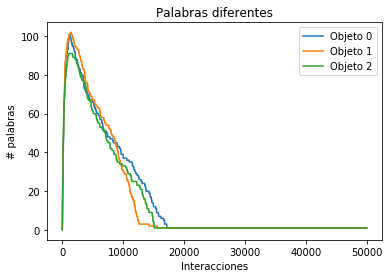

In [6]:
#Graficar los resultados.
plt.xlabel("Interacciones")
plt.ylabel("# palabras")
plt.title("Palabras diferentes")
for i in range(0, cantidad_objetos):
    plt.plot(interacciones,[pt[i] for pt in datos_palabras_diferentes],label = 'Objeto %s'%i)
plt.legend()
plt.show()